In [1]:
## Import packages
import networkx as nx
import numpy as np
from matplotlib import pyplot as pp
from axes_style import set_axes_style, set_axes_height, MinorSymLogLocator
import pandas as pd

## Set standard axes style
set_axes_style()

figWidth = 5
figHeight = 5

axes_height = 4

In [2]:
## Import graph
g = nx.read_graphml("/Users/emilyfulk/DeMMOworkflow/allHKseq_120.graphml") ## insert path to graphml file





In [3]:
# Return average degree of graph

def k_avg(graph):
    k_list = [k for n, k in graph.degree()]
    k_avg = np.sum(k_list)/len(k_list)
    return k_avg

In [4]:
def network_metrics(graph):
    # Function for calculating network metrics

    n = nx.number_of_nodes(g)
    print("Number of nodes:",n)

    m = nx.number_of_edges(g)
    print("Number of edges:",m)

    c = nx.number_connected_components(g)
    print("Number of connected components:", c)

    d = nx.density(g)
    print("Density:",d)

    k = k_avg(g)
    print("Average degree:",k)

    return c

num_components = network_metrics(g)

Number of nodes: 10139
Number of edges: 17553
Number of connected components: 6260
Density: 0.0003415339952797756
Average degree: 3.4624716441463654


In [5]:
## creat dictionary with [key]:value being [# of sequences]:# of components containing that many sequences
component_lengths = [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]
component_bins = {i:component_lengths.count(i) for i in component_lengths}
x = list(component_bins.keys())
y = list(component_bins.values())
print(component_bins)

{845: 1, 99: 1, 45: 1, 36: 2, 31: 1, 30: 1, 29: 1, 28: 1, 24: 3, 23: 1, 21: 1, 19: 1, 18: 1, 17: 1, 16: 5, 15: 1, 14: 8, 13: 4, 12: 7, 11: 8, 10: 7, 9: 13, 8: 21, 7: 17, 6: 25, 5: 54, 4: 86, 3: 188, 2: 758, 1: 5041}


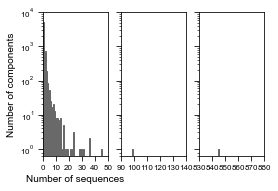

In [6]:
# plot histogram with y = number of components and x = number of sequences. Include axis breaks

#fig1 = pp.figure(figsize=(figWidth, figHeight))

fig1, (ax1, ax2, ax3) = pp.subplots(1, 3, sharey=True) # put two sets of axes on same plot
fig1.subplots_adjust(hspace=0.02)  # adjust space between axes

ax1.bar(x,y, color = 'dimgrey', edgecolor='dimgrey',clip_on=True) # plot data on both axes
ax2.bar(x,y, color = 'dimgrey',edgecolor='dimgrey', clip_on=True) # plot data on both axes
ax3.bar(x,y, color = 'dimgrey',edgecolor='dimgrey', clip_on=True)
# zoom-in / limit the view to different portions of the data
ax1.set_xlim(0,50)  # most of the data
ax1.set_xticks([0,10,20,30,40,50])
ax2.set_xlim(90,140) # outliers set 1
ax2.set_xticks([90,100,110,120,130,140])
ax3.set_xlim(830,880)
ax3.set_xticks([830,840,850,860,870,880])# outliers set 2
ax1.set_yscale('symlog',linthresh=1)
ax1.yaxis.set_minor_locator(MinorSymLogLocator(1))
ax1.set_ylim(0.8,10**4)

ax1.set_ylabel("Number of components")
ax1.set_xlabel("Number of sequences")
set_axes_height(ax1, 2)
set_axes_height(ax2, 2)
set_axes_height(ax3, 2)

#fileout1 = 'component_sequence_histogram.png'
#pp.savefig(fileout1, bbox_inches="tight",dpi=300)


In [7]:
## for each component, count the number of sites and number of phyla represented
all_phyla_dict = g.nodes.data("NCBI phylum", default="Unassigned")
all_site_dict = g.nodes.data("site_ID ")

sites_per_component = []
phyla_per_component = []
HK_per_component = []
number_of_components = 0
single_node_components = 0

for c in nx.connected_components(g):


    component_HK = len(c)

    if component_HK >= 2:
        HK_per_component.append(component_HK)

        component_phyla_list = []
        component_site_list = []

        for node in c:
            component_phyla_list.append(all_phyla_dict[node])
            component_site_list.append(all_site_dict[node])

        component_sites = len(list(set(component_site_list)))
        component_phyla = len(list(set(component_phyla_list)))

        sites_per_component.append(component_sites)
        phyla_per_component.append(component_phyla)

        number_of_components +=1

    else:
        single_node_components +=1
        pass

max_sites = max(sites_per_component)
max_phyla = max(phyla_per_component)
max_seqs = max(HK_per_component)


print(max_sites)
print(max_phyla)
print(max_seqs)
print(number_of_components)
print(single_node_components)


8
28
845
1219
5041


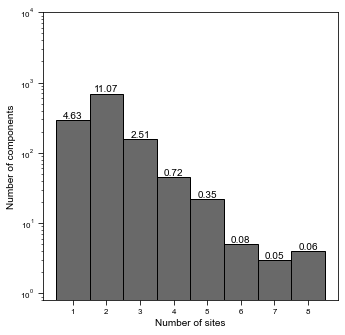

In [8]:
fig1, ax1 = pp.subplots(figsize =(5, 5))
#fig1_cdf, ax1_cdf = pp.subplots(figsize =(5, 5))

color = 'dimgrey'
edgecolor = 'black'

n1,bins1,patches1 = ax1.hist(sites_per_component, bins = np.arange(1,10), color = color, edgecolor = 'black',align = 'left', clip_on=True )
seq_percent = [(i/num_components)*100 for i in n1]
seq_percent_round = [round(j, 2) for j in seq_percent]

#ax1_cdf.hist(sites_per_component, bins = bins1, density=True, cumulative=True, histtype='step',color='red')
#ax1_cdf.hist(phyla_per_component, bins = bins2, color = 'blue', density=True, cumulative=True, histtype='step')

ax1.set_yscale('log')
ax1.set_ylim(0.8,10**4)
ax1.bar_label(patches1,labels=seq_percent_round)
ax1.set_ylabel("Number of components")
ax1.set_xlabel("Number of sites")
set_axes_height(ax1,axes_height)
fileA = '221024_site_per_component.svg'
pp.savefig(fileA,bbox_inches = "tight")

#pp.plot(bins1,cdf)

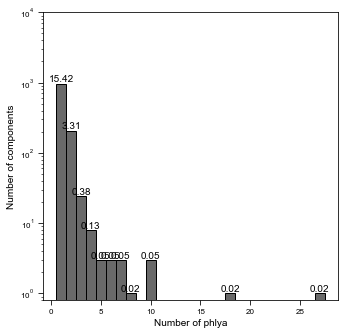

In [9]:
fig2, ax2 = pp.subplots(figsize =(5,5))



n2, bins2, patches2 = ax2.hist(phyla_per_component, bins = np.arange(1,29),color = color, edgecolor = 'black',align = 'left', clip_on = True)

#ax1_cdf.hist(phyla_per_component, bins = bins2, color = 'blue', density=True, cumulative=True, histtype='step')

phyla_percent = [(i/num_components)*100 for i in n2]
phyla_percent_round = [round(j, 2) for j in phyla_percent]
ax2.set_yscale('log')
ax2.bar_label(patches2, labels=phyla_percent_round)
ax2.set_ylabel("Number of components")
ax2.set_xlabel("Number of phlya")
ax2.set_ylim(0.8,10**4)
set_axes_height(ax2,axes_height)
fileB = '221024_phyla_per_component.svg'
pp.savefig(fileB,bbox_inches = "tight")

Text(0.5, 0, 'Number of HKs')

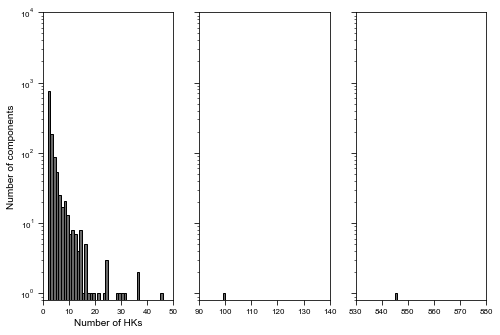

In [10]:
fig3, (ax3, ax4, ax5) = pp.subplots(1, 3, sharey=True) # put two sets of axes on same plot
fig3.subplots_adjust(hspace=0.02)  # adjust space between axes

n3,bins3,patches3 = ax3.hist(HK_per_component, bins = np.arange(1,850), color = color, edgecolor = 'black')
n4,bins4,patches4 = ax4.hist(HK_per_component, bins = np.arange(1,850), color = color, edgecolor = 'black')
n5,bins5,patches5 = ax5.hist(HK_per_component, bins = np.arange(1,850), color = color, edgecolor = 'black')

ax3.set_xlim(0,50)  # most of the data
ax3.set_xticks([0,10,20,30,40,50])
ax4.set_xlim(90,140) # outliers set 1
ax4.set_xticks([90,100,110,120,130,140])
ax5.set_xlim(830,880)
ax5.set_xticks([830,840,850,860,870,880])# outliers set 2


ax3.set_ylim(0.8,10**4)
ax4.set_ylim(0.8,10**4)
ax5.set_ylim(0.8,10**4)

ax3.set_yscale('log')
ax4.set_yscale('log')
ax5.set_yscale('log')

set_axes_height(ax3, 4)
set_axes_height(ax4, 4)
set_axes_height(ax5, 4)

ax3.set_ylabel("Number of components")
ax3.set_xlabel("Number of HKs")


#fileC = 'seq_per_component.svg'
#pp.savefig(fileC,bbox_inches = "tight")

In [11]:
gtdb_phylum_list = pd.read_csv("/Users/emilyfulk/DeMMOworkflow/SSN_gtdb_phylum_ist.csv")

for i in list(set(gtdb_phylum_list["phylum"])):
    phylum_count = list(gtdb_phylum_list["phylum"]).count(i)
    print(i, phylum_count)

Verrucomicrobiota 115
Elusimicrobiota 44
Desulfobacterota 760
OLB16 62
Deltaproteobacteria 18
Firmicutes 52
Desantibacteria 3
Edwardsbacteria 12
Proteobacteria 894
Dadabacteria 14
Cyanobacteriota 250
Nitrospirota 244
Myxococcota 64
Firmicutes_B 64
UBA3054 48
UBA9089 3
Spirochaetota 46
Omnitrophota 127
Latescibacterota 26
Armatimonadota 49
Acidobacteriota 59
Actinobacteriota 125
Patescibacteria 158
UBP1 33
UBA10199 3
Chloroflexota 211
Thermoplasmatota 14
Hadesarchaeota 1
Zixibacteria 99
Micrarchaeota 7
Halobacterota 4
MBNT15 1
Bdellovibrionota 33
Goldbacteria-1 38
Planctomycetota 298
Euryarchaeota 14
Elusimicrobia 2
Dependentiae 2
Margulisbacteria 20
Fusobacteriota 7
Gemmatimonadota 11
Nanoarchaeota 8
AABM5-125-24 40
Eremiobacterota 98
Eisenbacteria 43
Bacteroidota 543
Firmicutes_D 20
Bipolaricaulota 7


In [12]:

# 1 proteobacteria, 2 desulfobacteroa, 3 bacteriodota 4 planctomycetota, 5 cyanobacteria, 6 nitrospirota 7 chloroflexota 8 patescibacteria